# Method

#### Imports

#### Hardware Overview of computer that was used for benchmarking:

* Operating System: macOS Sierra
* Version: 10.13.1 (17B1003)
* Memory: 8 GB
* Processor Speed: 1,6 GHz
* Processor Name: Intel Core i5
* Python version: 



In [3]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]




### Insertion sort
* From Lecture 01

In [4]:
import numpy as np
import timeit
import random
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

In [5]:
def insertion_sort(a):
    ''' insertion sort works
    '''
    for j in range(1, len(a)):
        key = a[j]
        i = j - 1
        while i >= 0 and a[i] > key:
            a[i + 1] = a[i]
            i = i - 1
        a[i + 1] = key

### Merge sort

In [6]:
def mergesort(arr):
    '''Merge sort works as ldksglksdf
    '''
    if len(arr) > 1:
        mid = len(arr) // 2  # Finding the mid of the array
        l = arr[:mid]  # Dividing the array elements
        r = arr[mid:]  # into 2 halves

        mergesort(l)  # Sorting the first half
        mergesort(r)  # Sorting the second half

        i = j = k = 0

        # Copy data to temp arrays l[] and r[]
        while i < len(l) and j < len(r):
            if l[i] < r[j]:
                arr[k] = l[i]
                i += 1
            else:
                arr[k] = r[j]
                j += 1
            k += 1

        # Checking if any element was left
        while i < len(l):
            arr[k] = l[i]
            i += 1
            k += 1

        while j < len(r):
            arr[k] = r[j]
            j += 1
            k += 1


### Heap sort

In [7]:
def heapify(arr, n, i):
    '''Heap sort works as blablabla

    '''
    largest = i  # Initialize largest as root
    l = 2 * i + 1  # left = 2*i + 1
    r = 2 * i + 2  # right = 2*i + 2

    # See if left child of root exists and is
    # greater than root
    if l < n and arr[i] < arr[l]:
        largest = l

        # See if right child of root exists and is
    # greater than root
    if r < n and arr[largest] < arr[r]:
        largest = r

        # Change root, if needed
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap

        # Heapify the root.
        heapify(arr, n, largest)

    # The main function to sort an array of given size


def heapSort(arr):
    n = len(arr)

    # Build a maxheap.
    for i in range(n, -1, -1):
        heapify(arr, n, i)

        # One by one extract elements
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

### Quick Sort? 

In [8]:
def paritition(A, p, r):
    x = A[r]
    i = p-1
    for j in A[p:r]:
        if A[j] <= x:
            i = i+1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1

def quicksort(A, p, r):
    if p<r:
        q = paritition(A,p,r)
        quicksort(A,p,q-1)
        quicksort(A,q+1,r)

def sort_quick(A):
    p = 1
    r = len(A) -1
    quicksort(A, p, r)

#### Why Quick Sort is preferred over MergeSort for sorting Arrays

Quick Sort in its general form is an in-place sort (i.e. it doesn’t require any extra storage) whereas merge sort requires O(N) extra storage, N denoting the array size which may be quite expensive. Allocating and de-allocating the extra space used for merge sort increases the running time of the algorithm. Comparing average complexity we find that both type of sorts have O(NlogN) average complexity but the constants differ. For arrays, merge sort loses due to the use of extra O(N) storage space.
https://www.geeksforgeeks.org/quick-sort/ 

In [9]:
def create_data(n):
    array_lengths = [10**i for i in range(1,n)]
    rising_arrays = []
    decaying_arrays = []
    equal_ints = []
    random_arrays = []
    for length in array_lengths:
        rising_arrays.append(np.array(range(length)))
        decaying_arrays.append(np.flip(range(length)))
        equal_ints.append([1 for _ in range(length)])
        random_arrays.append(np.random.randint(1,length,length))
    return rising_arrays, decaying_arrays, equal_ints, random_arrays, array_lengths

In [10]:
def benchmarking(sort_function, test_data):
    """
    A function which sorts the test_data based on a specific sort_function and stores the min time used on a number of repetitions.
    
    parameters:
    sort_function = the sorting function used
    test_data = the array to be sorted
    p, q and r = integers which represents indexes in the array to be sorted in the divide-and-conquer approach, None by default.
    
    """
    clock = timeit.Timer(stmt = 'sort_func(copy(data))', globals={'sort_func': sort_function, 'data':test_data, 'copy':copy.copy})

    n_ar, t_ar = clock.autorange()
    t = clock.repeat(repeat=7, number=n_ar)
    time = min(t)
    
    return time

In [11]:
def simulate(sort_function, n, array_type, path):
    """
    sort_function: sorting function used for sorting
    array_type: 'rising_order', 'decaying_order', 'equal_integers', random_numbers'.
    n: highest power of ten, deciding the size od the biggest array to be sorted
    path: the path where dataframes created should be stored
    """
    rising_arrays, decaying_arrays, equal_ints, random_arrays, array_lengths = create_data(n)
    data = []
    i = 0
    if array_type == 'rising_order':
        for array in rising_arrays:
            data.append(benchmarking(sort_function, array))
            i = i+1
    elif array_type == 'decaying_order':
        for array in decaying_arrays:
            data.append(benchmarking(sort_function, array))
            i = i+1
    elif array_type == 'equal_integers':
        for array in equal_ints:
                data.append(benchmarking(sort_function, array))
                i = i+1
    elif array_type == 'random_numbers':
        for array in random_arrays:
                data.append(benchmarking(sort_function, array))
                i = i+1
    else:
        raise ValueError('set array type as rising_order, decaying_order, equal_integers or random_numbers')
    
    times = pd.DataFrame(columns = array_lengths, index = ['time used'])
    times.loc['time used'] = data
    print(times)
    path = '{0}{1}{2}{3}'.format(path, sort_function.__name__, n, array_type)
    times.to_pickle(path)

In [12]:
def plotting(file_path, n, array_type, sorting_function1 = None, sorting_function2 = None, sorting_function3 = None, sorting_function4 = None,  sorting_function5 = None):
    '''
    file_path: direction of where the file is stored as string
    sorting_function: sorting function preferred to plot
    n: the highest power of ten, deciding the size of the biggest array to be sorted
    array_type: 'rising_order', 'decaying_order', 'equal_integers', random_numbers'.
    '''
    
    files = []
    function_names = []
    for function in range(1,6):
        function_name = eval('sorting_function{0}'.format(function))
        function_names.append(function_name)
        if function_name != None:
            files.append(pd.read_pickle('{0}{1}{2}{3}'.format(file_path, function_name.__name__, n, array_type)))
    plt.figure()
    plt.title(array_type)
    plt.xlabel('the size of array as the power of ten')
    plt.ylabel('time used for sorting in ms')
    i = 0
    for file in files:
        x = [math.log10(m) for m in file.columns]
        y = file.iloc[0,:]
        line = plt.plot(x,y, label= '{0}'.format(function_names[i].__name__))
        i += 1
    plt.legend()
    plt.savefig('{0}{1}'.format(file_path, array_type))
    plt.show()

In [35]:
simulate(insertion_sort, 4, 'random_numbers', 'C:/Users/kajsi/Documents/NMBU/Inf221/Semesteroppgave/')

               10        100       1000
time used  0.197508  0.267029  0.257861


In [23]:
simulate(mergesort, 4, 'rising_order', 'C:/Users/kajsi/Documents/NMBU/Inf221/Semesteroppgave/')

               10        100       1000
time used  0.182242  0.329045  0.432396


In [121]:
simulate(heapSort, 4, 'rising order')

[0.3102408109989483, 0.25534922100268886, 0.19171021199872484]


In [122]:
simulate(sort_quick, 4, 'rising order')

[0.14347947900023428, 0.3164944939999259, 0.6192863449978177]


In [123]:
simulate(sorted, 4, 'rising order')

[0.21451274100036244, 0.3538634100004856, 0.294224930999917]


In [127]:
%timeit sort_quick(A)

21.1 µs ± 459 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [128]:
%timeit insertion_sort(A)

3.75 µs ± 388 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit insertion_sort(A)

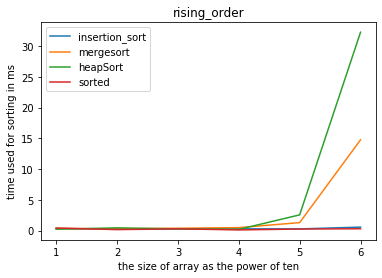

In [13]:
plotting('C:/Users/kajsi/Documents/NMBU/Inf221/Semesteroppgave/', 7, 'rising_order', sorting_function1 = insertion_sort, sorting_function2 = mergesort, sorting_function3 = heapSort, sorting_function4 = sorted, sorting_function5 = None)